# Week 7 Check-In
## Team Spotiflies: Joanna, Aaron, Aubrey, Kennedy, Aster, Ethan
GitHub Link: https://github.com/ketexon/csm148-spotiflies

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn mlxtend


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# SETUP data set like in week 4:


import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Reading in the cleaned data from previous week check in
spotify = pd.read_csv("csv_outputs/cleaned_spotify.csv")

# select the variables of interest
selected_spotify = spotify[['mode', 'valence']]
selected_spotify

random_seed = 42
response = 'mode'
predictor = 'valence'

# Splitting the data
# First split: separate out 20% for the test set
spotify_train_val, spotify_test = train_test_split(selected_spotify, test_size=0.2, random_state=random_seed)

# Second split: separate remaining 80% into 60% training and 40% validation
spotify_train, spotify_val = train_test_split(spotify_train_val, test_size=0.25, random_state=random_seed)  # 0.25 * 0.8 = 0.2

# Reshape the data to fit the model
X_train = spotify_train.drop(columns=response)
y_train = spotify_train[response]

# fit the model and list intercept and coefficient
logistic_reg = LogisticRegression(solver='liblinear')
logistic_reg.fit(X=X_train,y=y_train)

# generate values for plotting the curve as a DataFrame with the same column name
x_values = pd.DataFrame(np.linspace(0, 1, 100), columns=[predictor])  # Use 'valence' as the column name

# Now you can predict the probabilities without the feature name issue
y_values = logistic_reg.predict_proba(x_values)[:, 1]

Because there are correlations among predictors (e.g., danceability might be related to energy), and we want a simplified, interpretable model that doesn’t compromise on performance by discarding unnecessary dimensions, we chose PCA for dimentionality reduction.

Explained variance ratio for each component: [0.40825774 0.29021192 0.17680912 0.12472123]
Cumulative explained variance: [0.40825774 0.69846965 0.87527877 1.        ]
Number of components to retain 95% variance: 4
Validation Accuracy: 0.6331140350877194
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.01      0.02      8276
           1       0.64      0.99      0.77     14524

    accuracy                           0.63     22800
   macro avg       0.50      0.50      0.40     22800
weighted avg       0.53      0.63      0.50     22800



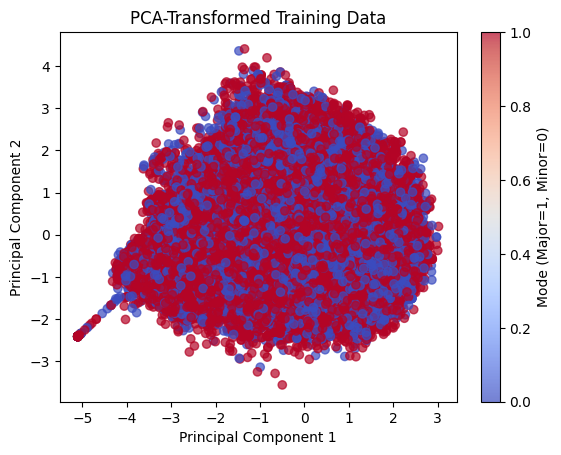

In [3]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming the Spotify dataset contains these columns
selected_spotify = spotify[['mode', 'valence', 'tempo', 'danceability', 'energy']]

# Define predictors and response
response = 'mode'
predictors = ['valence', 'tempo', 'danceability', 'energy']

# Splitting the data
spotify_train_val, spotify_test = train_test_split(selected_spotify, test_size=0.2, random_state=random_seed)
spotify_train, spotify_val = train_test_split(spotify_train_val, test_size=0.25, random_state=random_seed)  # 0.25 * 0.8 = 0.2

# Separate predictors and response
X_train = spotify_train[predictors]
y_train = spotify_train[response]
X_val = spotify_val[predictors]
y_val = spotify_val[response]

# Standardize the predictors to ensure PCA is scale-invariant
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# Check explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio for each component: {explained_variance}")
print(f"Cumulative explained variance: {np.cumsum(explained_variance)}")

# Decide on the number of components (e.g., retain 95% of variance)
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

# Reduce the data to the selected number of components
pca = PCA(n_components=n_components)
X_train_pca_reduced = pca.fit_transform(X_train_scaled)
X_val_pca_reduced = pca.transform(X_val_scaled)

# Logistic Regression on the PCA-transformed data
logistic_reg = LogisticRegression(solver='liblinear')
logistic_reg.fit(X_train_pca_reduced, y_train)

# Predictions and Evaluation
y_val_pred = logistic_reg.predict(X_val_pca_reduced)
print("Validation Accuracy:", metrics.accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", metrics.classification_report(y_val, y_val_pred))

# Optional: Visualize PCA-transformed data
plt.scatter(X_train_pca_reduced[:, 0], X_train_pca_reduced[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title("PCA-Transformed Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Mode (Major=1, Minor=0)')
plt.show()
